<a href="https://colab.research.google.com/github/sushant1212/gennav/blob/master/examples/planners/RRG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Example of using RRG algorithm from GenNav

In [ ]:
!git clone https://github.com/ERC-BPGC/gennav.git

!pip install gennav

fatal: destination path 'gennav' already exists and is not an empty directory.
  Created wheel for gennav: filename=gennav-0.1.1-cp36-none-any.whl size=22229 sha256=3946799e9d5cf3feb59a15dceb0f2dd119a5a2d76f9f5cc6abd2be3b4bb92836
  Stored in directory: /root/.cache/pip/wheels/a6/02/0d/fa84d74261bff734763484f758232593ccff366a0a2a816fcc
Successfully built gennav


In [ ]:
from gennav.planners import RRG # importing RRG planner
from gennav.envs import PolygonEnv # importing polygon environment
from gennav.utils import RobotState # importing Robostate to give start/end coordinates
from gennav.utils.geometry import Point # importing Point to give start/end coordinates
from gennav.utils.samplers import UniformRectSampler # importing sampler class 

In [ ]:
general_obstacles_list = [
                          
        [[(8, 5), (7, 8), (2, 9), (3, 5)], [(3, 3), (3, 5), (5, 5), (5, 3)]],
        
        [
            [(2, 10), (7, 10), (7, 1), (6, 1), (6, 6), (4, 6), (4, 9), (2, 9)],
            [(4, 0), (4, 5), (5, 5), (5, 0)],
            [(8, 2), (8, 7), (10, 7), (10, 2)],
        ],
    ]

    # A list of obstacles for the planner.

In [ ]:
sampler = UniformRectSampler(-5, 15, -5, 15) # for uniformly sampling points

In [ ]:
poly = PolygonEnv(buffer_dist=1.0) # intializing the environment object needed for updating the obstacles of the environment

In [ ]:
my_tree = RRG(sampler=sampler, expand_dis=1.0, max_iter=500) # initializing RRG planner object

In [ ]:
start = RobotState(position=Point(0, 0)) # setting start point to (0,0)
goal = RobotState(position=Point(10, 10)) # setting end point to (0,0)

In [ ]:
for obstacles in general_obstacles_list: # updating the environment with all obstacles
  poly.update(obstacles)
path, _ = my_tree.plan(start, goal, poly) # planning the path

Goal Reached!


/content/gennav/gennav/envs/common.py:26: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(111)


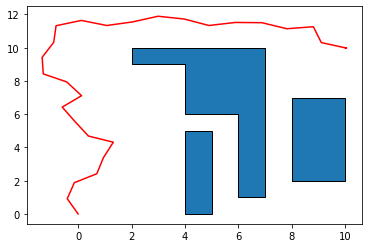

In [ ]:
from gennav.envs.common import visualize_path # module for visualizing path
visualize_path(path, poly) # visualize path and obstacles